# 1. Load data

In [10]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, metrics
from sklearn.utils import shuffle

from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import GradientBoostingClassifier

pd.options.mode.chained_assignment = None
sns.mpl.rc("figure", figsize=(15,8))

df_base = pd.read_csv('bank-classification.csv')

# Change type of results column
df_base.y.replace(('yes', 'no'), (1, 0), inplace=True)

# Transform strings into datetimes
df_base['birth_date'] = pd.to_datetime(df_base['birth_date'], format='%Y-%m-%d')
df_base['contact_date'] = pd.to_datetime(df_base['contact_date'], format='%Y-%m-%d')


# 2. Feature engineering

In [11]:
df = df_base.copy()
'''
one_hot_columns = ['poutcome', 'pdays', 'loan']

print df.dtypes

'''

"\none_hot_columns = ['poutcome', 'pdays', 'loan']\n\nprint df.dtypes\n\n"

### New feature - contact weekday

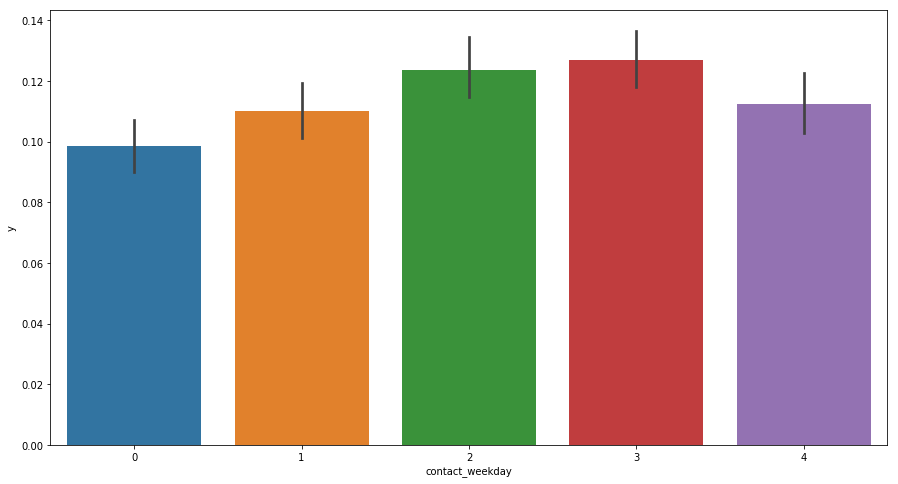

In [12]:
df['contact_weekday'] = df['contact_date'].apply(lambda x: x.weekday())

learn = df.loc[df['y'] != 'unknown'].copy()
learn['y'] = learn['y'].astype('int64')
sns.barplot(x='contact_weekday', y='y', data=learn)
plt.show()

### New feature - contact month

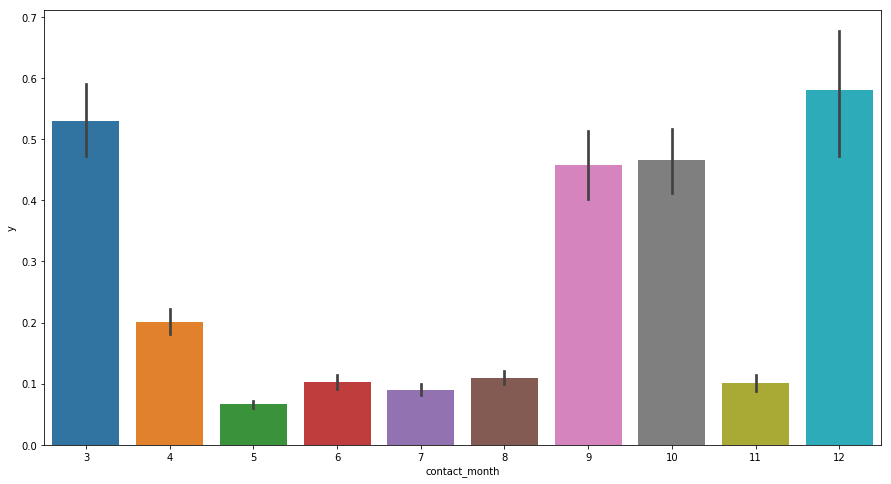

In [13]:
df['contact_month'] = df['contact_date'].apply(lambda x: x.month)

learn = df.loc[df['y'] != 'unknown'].copy()
learn['y'] = learn['y'].astype('int64')
sns.barplot(x='contact_month', y='y', data=learn)
plt.show()

### New feature - contact day

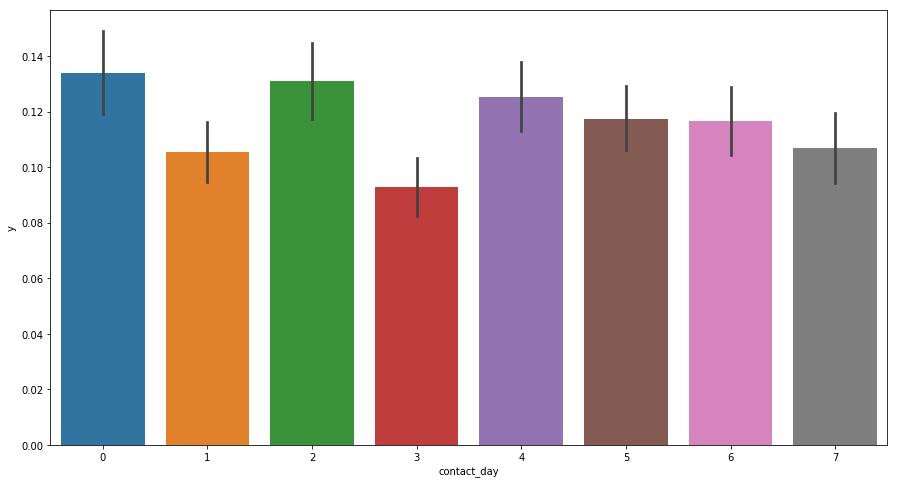

In [14]:
df['contact_day'] = df['contact_date'].apply(lambda x: x.day/4)

learn = df.loc[df['y'] != 'unknown'].copy()
learn['y'] = learn['y'].astype('int64')
sns.barplot(x='contact_day', y='y', data=learn)
plt.show()

### New feature - birth month

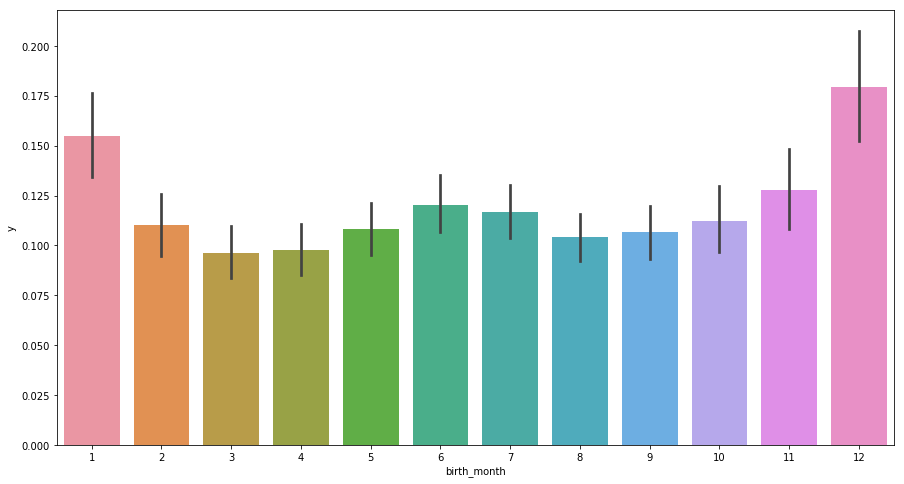

In [15]:
df['birth_month'] = df['birth_date'].apply(lambda x: x.month)

learn = df.loc[df['y'] != 'unknown'].copy()
learn['y'] = learn['y'].astype('int64')
sns.barplot(x='birth_month', y='y', data=learn)
plt.show()

### New feature - Has housing without loan

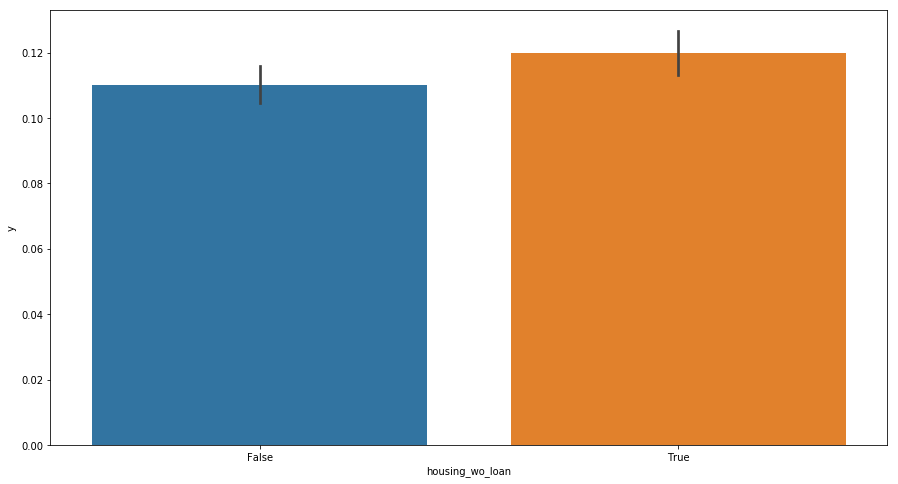

In [16]:
learn = df.loc[df['y'] != 'unknown'].copy()
learn['y'] = learn['y'].astype('int64')
learn['housing_wo_loan'] = learn.apply(lambda x: x['housing']=='yes' and x['loan']=='no', axis=1)
sns.barplot(x='housing_wo_loan', y='y', data=learn)
plt.show()


df['housing_wo_loan'] = df.apply(lambda x: x['housing']=='yes' and x['loan']=='no', axis=1)

### Feature - job

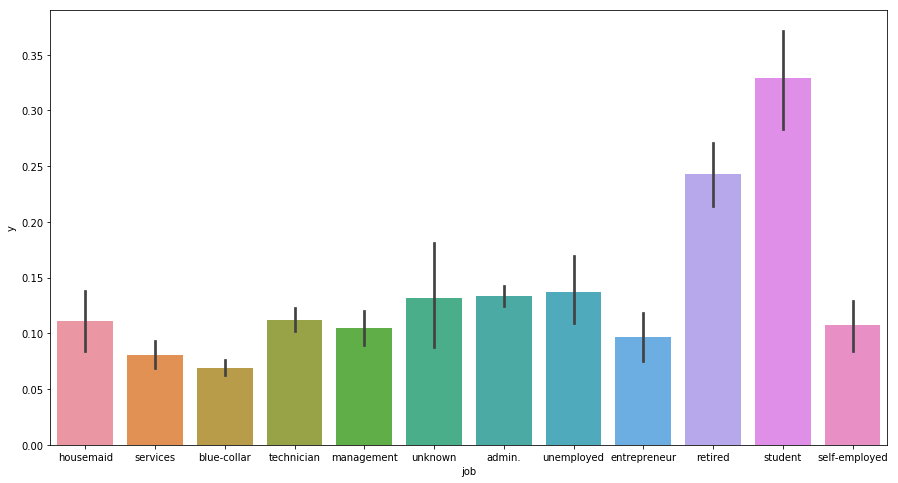

In [17]:
learn = df_base.loc[df['y'] != 'unknown'].copy()
learn['y'] = learn['y'].astype('int64')
sns.barplot(x='job', y='y', data=learn)
plt.show()

df = pd.get_dummies(df, columns=['job'])

### Feature - marital

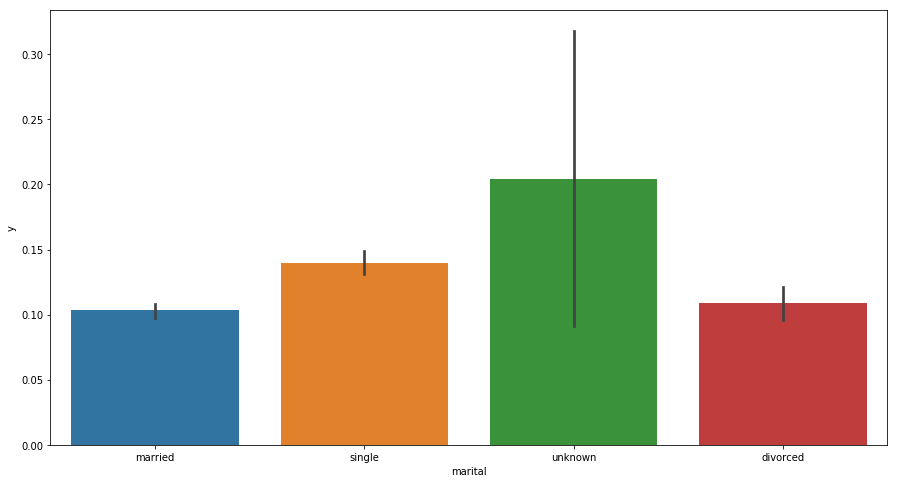

In [19]:
learn = df_base.loc[df['y'] != 'unknown'].copy()
learn['y'] = learn['y'].astype('int64')
sns.barplot(x='marital', y='y', data=learn)
plt.show()

df = pd.get_dummies(df, columns=['marital'])

### Feature - education

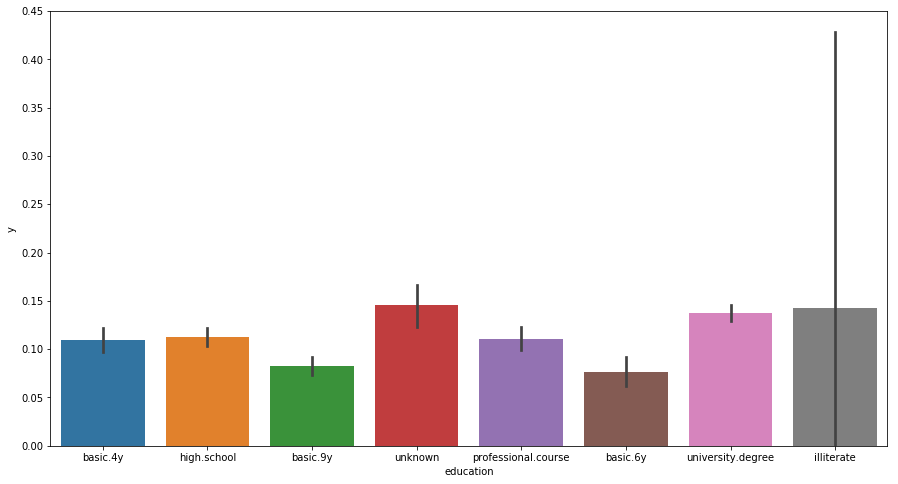

In [20]:
learn = df_base.loc[df['y'] != 'unknown'].copy()
learn['y'] = learn['y'].astype('int64')
sns.barplot(x='education', y='y', data=learn)
plt.show()

df = pd.get_dummies(df, columns=['education'])

### Feature - default

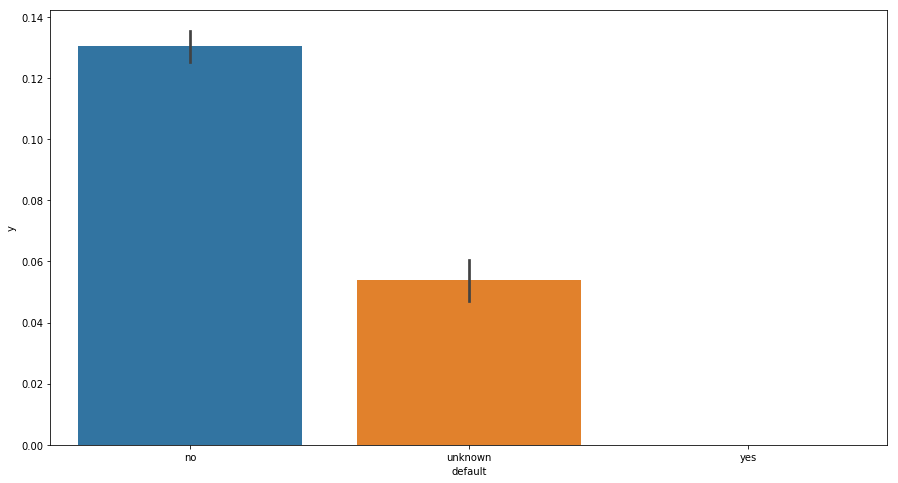

In [21]:
learn = df_base.loc[df['y'] != 'unknown'].copy()
learn['y'] = learn['y'].astype('int64')
sns.barplot(x='default', y='y', data=learn)
plt.show()

df = pd.get_dummies(df, columns=['default'])

### Feature - housing

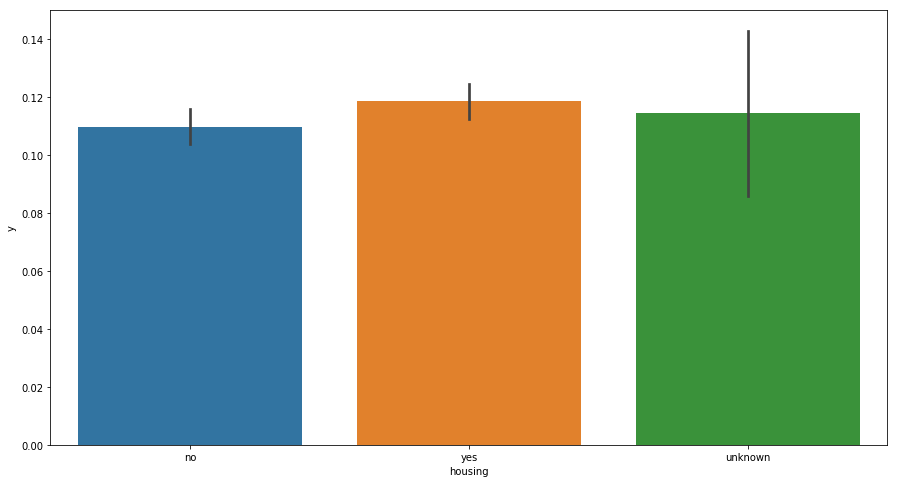

In [22]:
learn = df_base.loc[df['y'] != 'unknown'].copy()
learn['y'] = learn['y'].astype('int64')
sns.barplot(x='housing', y='y', data=learn)
plt.show()

df = pd.get_dummies(df, columns=['housing'])

### Feature - loan

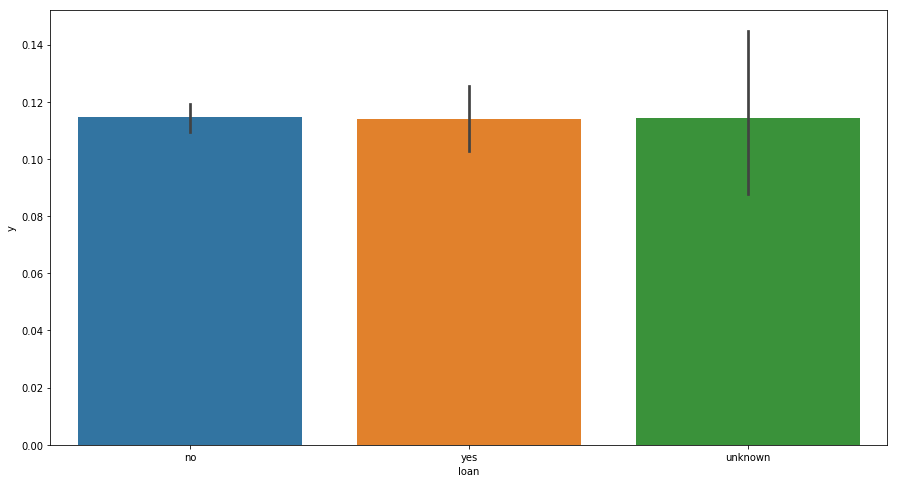

In [23]:
learn = df_base.loc[df['y'] != 'unknown'].copy()
learn['y'] = learn['y'].astype('int64')
sns.barplot(x='loan', y='y', data=learn)
plt.show()

#df = pd.get_dummies(df, columns=['loan'])

### Feature - contact

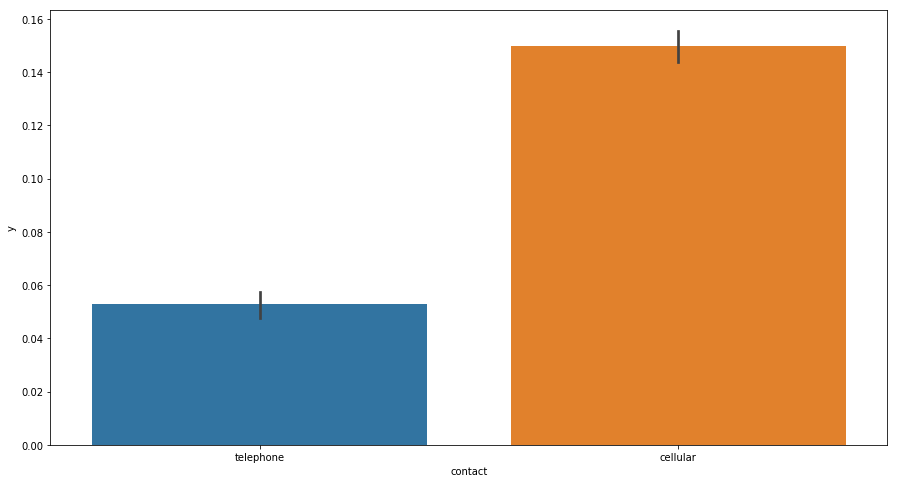

In [24]:
learn = df_base.loc[df['y'] != 'unknown'].copy()
learn['y'] = learn['y'].astype('int64')
sns.barplot(x='contact', y='y', data=learn)
plt.show()

df.contact.replace(('cellular', 'telephone'), (1, 0), inplace=True)

### Feature - pdays 

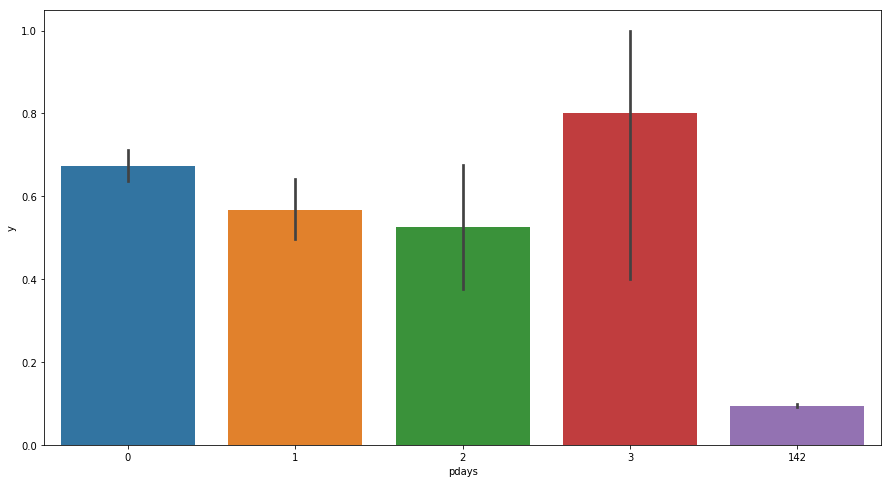

In [25]:
learn = df_base.loc[df['y'] != 'unknown'].copy()
learn['y'] = learn['y'].astype('int64')
learn['pdays'] = learn['pdays'].apply(lambda x: x/7)
sns.barplot(x='pdays', y='y', data=learn)
plt.show()

df['pdays'] = df['pdays'].apply(lambda x: x/7)
# becacuse highest value has not much in common with others, let's one hot this feature
df = pd.get_dummies(df, columns=['pdays'])

### Feature - campaign

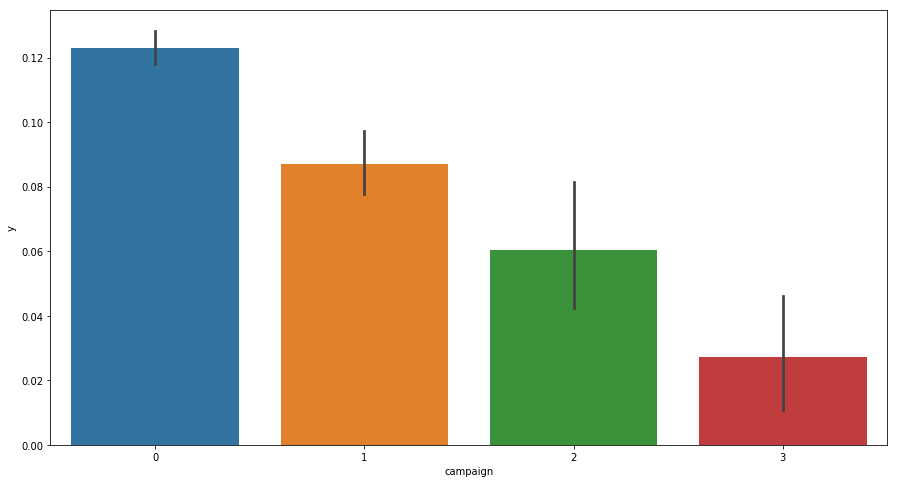

In [28]:
learn = df_base.loc[df['y'] != 'unknown'].copy()
learn['y'] = learn['y'].astype('int64')
learn['campaign'] = learn['campaign'].apply(lambda x: x/4)
learn.loc[learn.campaign > 2, 'campaign'] = 3
sns.barplot(x='campaign', y='y', data=learn)
plt.show()

df['campaign'] = df['campaign'].apply(lambda x: x/4)
df.loc[df.campaign > 2, 'campaign'] = 3

### Feature - contact_date

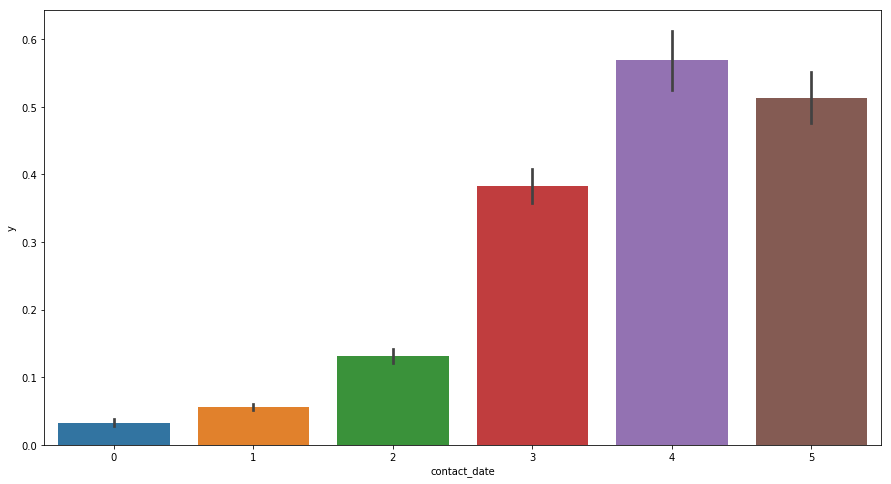

In [29]:
learn = df.loc[df['y'] != 'unknown'].copy()
learn['y'] = learn['y'].astype('int64')
learn['contact_date'] = learn['contact_date'].apply(lambda x: (x.month + (x.year-2008)*12)/6)
sns.barplot(x='contact_date', y='y', data=learn)
plt.show()

df['contact_date'] = df['contact_date'].apply(lambda x: (x.month + (x.year-2008)*12)/6)

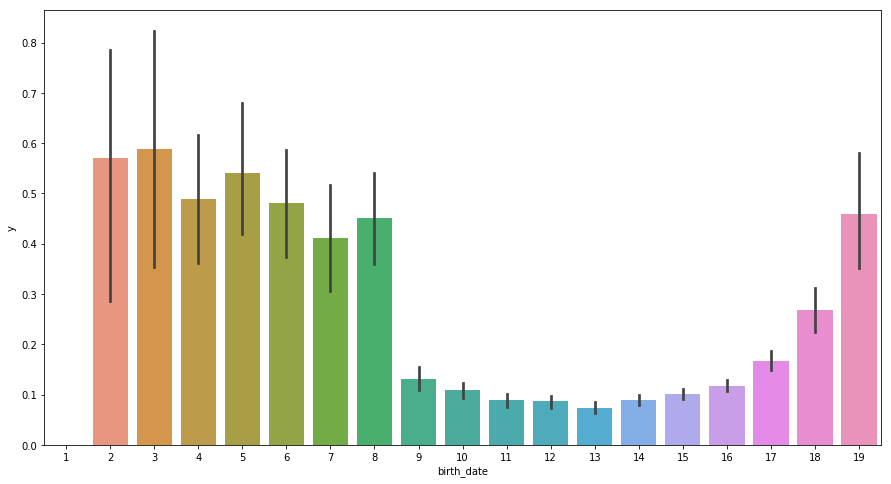

In [30]:
learn = df.loc[df['y'] != 'unknown'].copy()
learn['y'] = learn['y'].astype('int64')
learn['birth_date'] = learn['birth_date'].apply(lambda x: (x.month + (x.year-1910)*12)/50)
sns.barplot(x='birth_date', y='y', data=learn)
plt.show()

df['birth_date'] = df['birth_date'].apply(lambda x: (x.month + (x.year-1910)*12)/50)

### Feature - poutcome

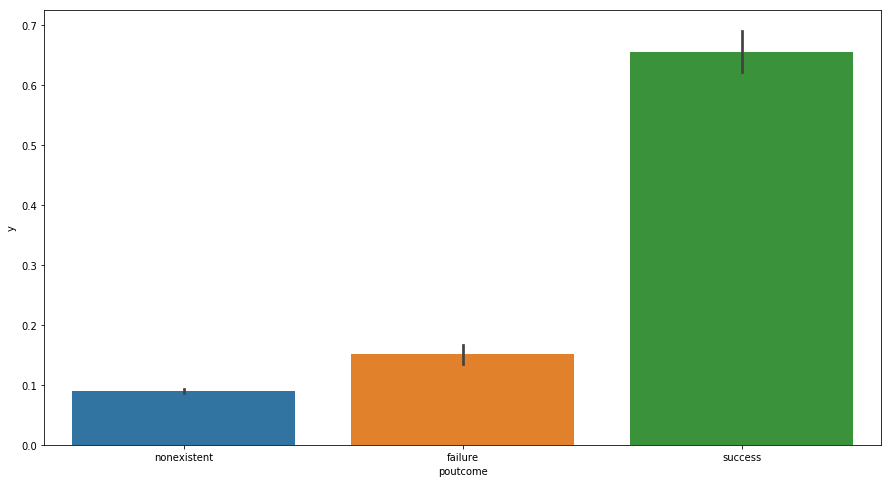

In [33]:
learn = df_base.loc[df['y'] != 'unknown'].copy()
learn['y'] = learn['y'].astype('int64')
sns.barplot(x='poutcome', y='y', data=learn)
plt.show()

df = pd.get_dummies(df, columns=['poutcome'])

### Table types

In [40]:
print df.dtypes

id                                int64
birth_date                        int64
loan                             object
contact_date                      int64
contact                           int64
campaign                          int64
previous                          int64
y                                object
contact_weekday                   int64
contact_month                     int64
contact_day                       int64
birth_month                       int64
housing_wo_loan                    bool
job_admin.                        uint8
job_blue-collar                   uint8
job_entrepreneur                  uint8
job_housemaid                     uint8
job_management                    uint8
job_retired                       uint8
job_self-employed                 uint8
job_services                      uint8
job_student                       uint8
job_technician                    uint8
job_unemployed                    uint8
job_unknown                       uint8


# 4. Learning

In [41]:
# Split data into learning and testing rows
learn = df.loc[df['y'] != 'unknown']
test = df.loc[df['y'] == 'unknown']
learn['y'] = learn['y'].astype('int64')
learn = shuffle(learn)

#predicators = ['contact_cellular', 'contact_telephone', 'poutcome_success', 'poutcome_nonexistent', 'poutcome_nonexistent', 'loan_no', 'loan_yes', 'loan_unknown', 'housing_unknown', 'housing_yes', 'housing_no', 'previous', 'default_no', 'default_yes', 'default_unknown']
predictors = [x for x in learn.columns if x not in ['y', 'loan', 'birthday_call']]
params_ranges = {'n_estimators': [40, 200],
                 'min_samples_split': [150, 500],
                 'min_samples_leaf': [50, 100],
                 'max_depth': [5, 8],
                 'subsample': [0.5, 0.9]}

classifier = GradientBoostingClassifier(learning_rate=0.05, max_features='sqrt', random_state=13)
gsearch = RandomizedSearchCV(estimator = classifier, param_distributions=params_ranges, scoring='roc_auc', n_jobs=8, iid=False, cv=5)

gsearch.fit(learn[predictors], learn['y'])

print gsearch.best_params_, gsearch.best_score_


{'n_estimators': 200, 'subsample': 0.9, 'min_samples_split': 150, 'max_depth': 5, 'min_samples_leaf': 50} 0.792016301338


In [42]:
dtrain_predictions = gsearch.predict(learn[predictors])
cv_score = model_selection.cross_val_score(gsearch, learn[predictors], learn['y'], cv=10, scoring='roc_auc')
dtrain_predprob = gsearch.predict_proba(learn[predictors])[:,1]

In [43]:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(learn['y'].values, dtrain_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(learn['y'], dtrain_predprob)
print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))


Model Report
Accuracy : 0.9065
AUC Score (Train): 0.832421
CV Score : Mean - 0.7925745 | Std - 0.01754673 | Min - 0.7480223 | Max - 0.8152687


In [62]:
from sklearn.model_selection import GridSearchCV

grid1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, max_depth=7, min_samples_split=200, min_samples_leaf=50, max_features='sqrt', subsample=0.8),
                     param_grid = {'n_estimators':range(20, 30, 1)}, 
                     scoring='roc_auc',
                     n_jobs=-1,
                     cv=15)

grid1.fit(learn[predictors], learn['y'])
print grid1.best_params_, grid1.best_score_

{'n_estimators': 22} 0.792413032413


In [64]:
grid2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=22, min_samples_leaf=50, max_features='sqrt', subsample=0.8),
                     param_grid = {'max_depth':range(5,11,1), 'min_samples_split':range(100, 201, 10)},
                     scoring='roc_auc',
                     n_jobs=-1,
                     cv=5)

grid2.fit(learn[predictors], learn['y'])
print grid2.best_params_, grid2.best_score_

{'min_samples_split': 180, 'max_depth': 7} 0.791701777298


In [68]:
grid3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=22, max_depth=7, max_features='sqrt', subsample=0.8),
                     param_grid = {'min_samples_split':range(200, 301,10), 'min_samples_leaf':range(20, 41, 4)},
                     scoring='roc_auc',
                     n_jobs=-1,
                     cv=5)

grid3.fit(learn[predictors], learn['y'])
print grid3.best_params_, grid3.best_score_

{'min_samples_split': 240, 'min_samples_leaf': 32} 0.792423398793


In [70]:
grid4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=22, max_depth=7, min_samples_split=240, min_samples_leaf=32, subsample=0.8),
                     param_grid = {'max_features':range(7,20,1)},
                     scoring='roc_auc',
                     n_jobs=-1,
                     cv=15)

grid4.fit(learn[predictors], learn['y'])
print grid4.best_params_, grid4.best_score_

{'max_features': 17} 0.797038704069


In [72]:
param_test5 = {'subsample':[0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.9]}
grid5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=22, max_depth=7, min_samples_split=240, min_samples_leaf=32, subsample=0.8, max_features=17),
                     param_grid = {'subsample':[0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.9]},
                     scoring='roc_auc',
                     n_jobs=-1,
                     cv=15)

grid5.fit(learn[predictors], learn['y'])
print grid5.best_params_, grid5.best_score_

{'subsample': 0.71} 0.796707512861


In [80]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['y'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = model_selection.cross_val_score(alg, dtrain[predictors], dtrain['y'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['y'].values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['y'], dtrain_predprob)
    
    if performCV:
        print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.9071
AUC Score (Train): 0.842986
CV Score : Mean - 0.7954068 | Std - 0.0135793 | Min - 0.7699158 | Max - 0.8093112


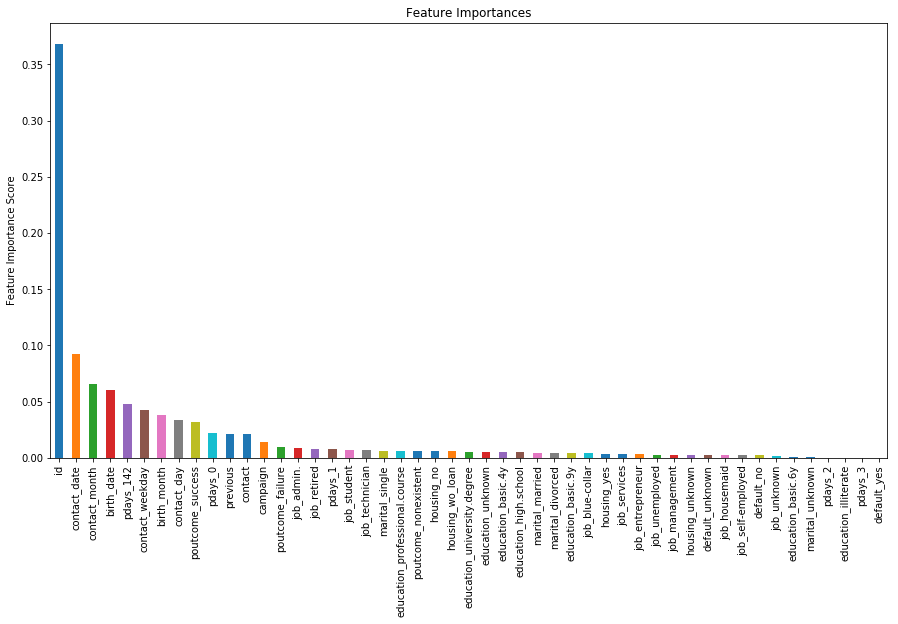

In [90]:
tune1 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1000, max_depth=7, min_samples_split=240, min_samples_leaf=32, subsample=0.71, max_features=17, warm_start=True)

modelfit(tune1, learn, predictors)


# 5. Predict

In [44]:
test = df.loc[df['y'] == 'unknown']
results = gsearch.predict_proba(test[predictors])
test['y'] = results
test[['id', 'y']].to_csv("results.csv", encoding='utf-8', index=False)